In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 17.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.2.0 which is incompatible.


In [3]:
df = pd.read_csv('../DataSets/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
import pmdarima as pm
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.67 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.16 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.29 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.06 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.29 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 20 Oct 2025   AIC                            905.686
Time:                                    15:51:47   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

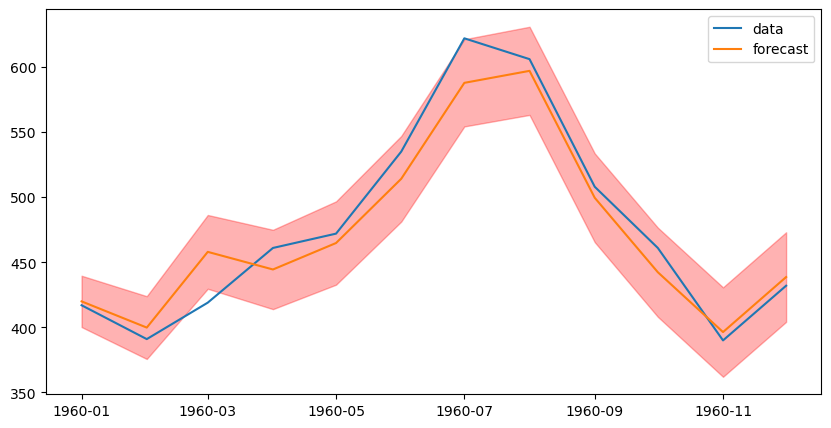

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

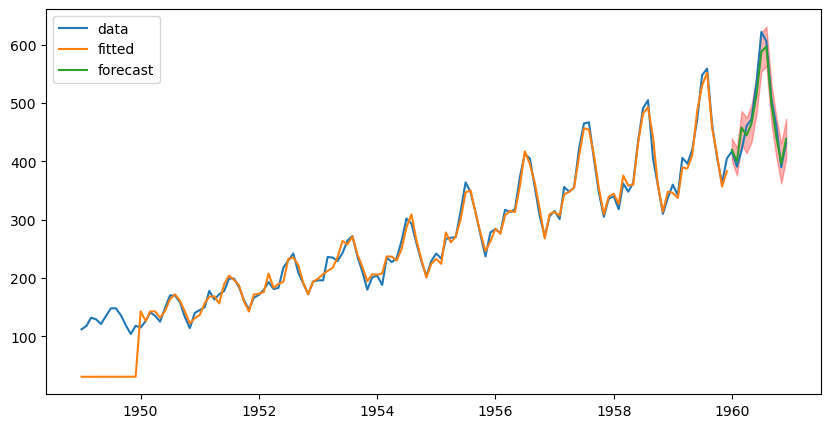

In [10]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [12]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.388, Time=1.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.12 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.27 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=2.56 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=0.76 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.572, Time=0.55 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.12 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.509, Time=0.87 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.555, Time=1.54 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [13]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 20 Oct 2025   AIC                           -448.052
Time:                                      11:16:48   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.6001      0.083      7.269      0.000       0.438       0.762
ar.L2          0.2417      0.085      2.853      0.004       0.076       0.408
ma.S.L12      -0.5672      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.191      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.09
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

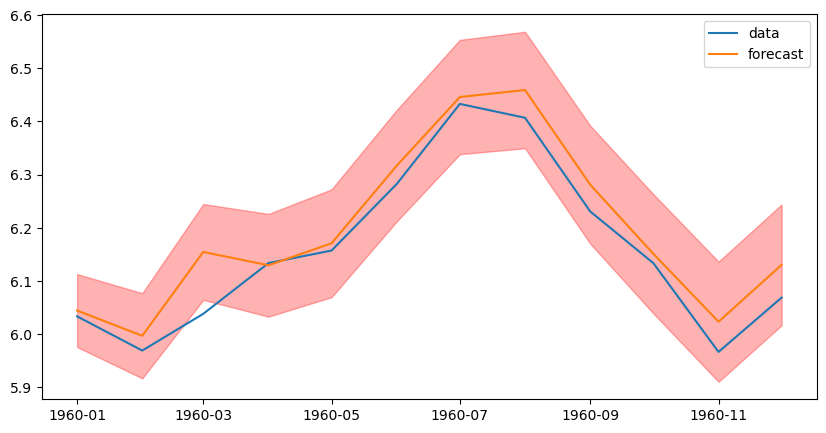

In [14]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

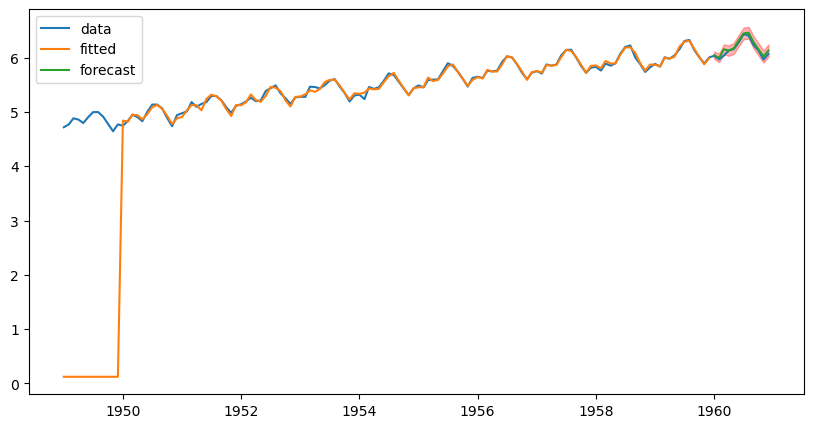

In [15]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [16]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.53646883723073
Logged RMSE: 23.044167632336972


In [17]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-213.900, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.338, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-206.419, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.031, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.960
Date:                Mon, 20 Oct 2025   AIC                           -305.921
Time:                        11:17:03   BIC                           -262.679
Sample:                    01-01-1949   HQIC                          -288.349
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0477      0.080      0.597      0.551      -0.109       0.205
ar.L2          0.1640      0.098      1.676      0.094      -0.028       0.356
ar.L3          0.1064      0.098      1.082      0.279      -0.086       0.299
ar.L4         -0.0990      0.078     -1.264      0.206      -0.252       0.054
ar.L5          0.0667      0.079      0.848      0.396      -0.087       0.221
ar.L6          0.0717      0.082      0.877      0.380      -0.089       0.232
ar.L7         -0.0404      0.084     -0.482      0.630      -0.205       0.124
ar.L8         -0.0985      0.085     -1.161      0.246      -0.265       0.068
ar.L9         -0.0125      0.080     -0.155      0.877      -0.170       0.145
ar.L10         0.0938      0.075      1.252      0.210      -0.053       0.241
ar.L11        -0.0805      0.081     -0.998      0.318      -0.239       0.078
ar.L12         0.7804      0.079      9.857      0.000       0.625       0.936
ma.L1          0.9445      0.096      9.874      0.000       0.757       1.132
ma.L2          0.6292      0.082      7.692      0.000       0.469       0.789
sigma2         0.0038      0.001      6.765      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   3.79   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.05   Prob(JB):                         0.53
Heteroskedasticity (H):               0.50   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

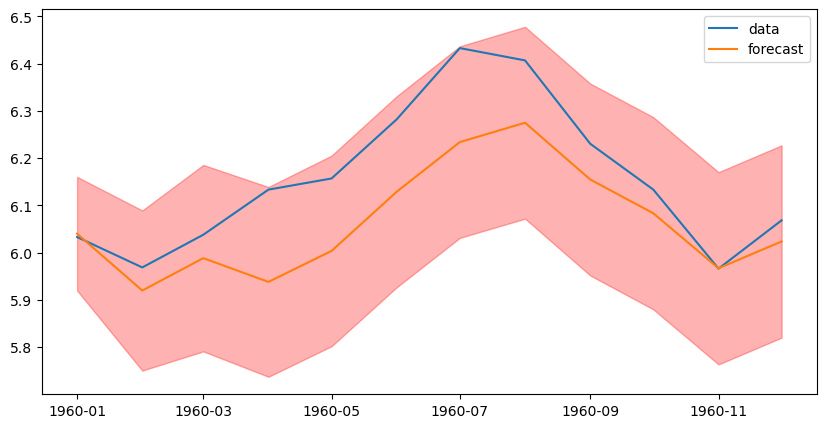

In [19]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

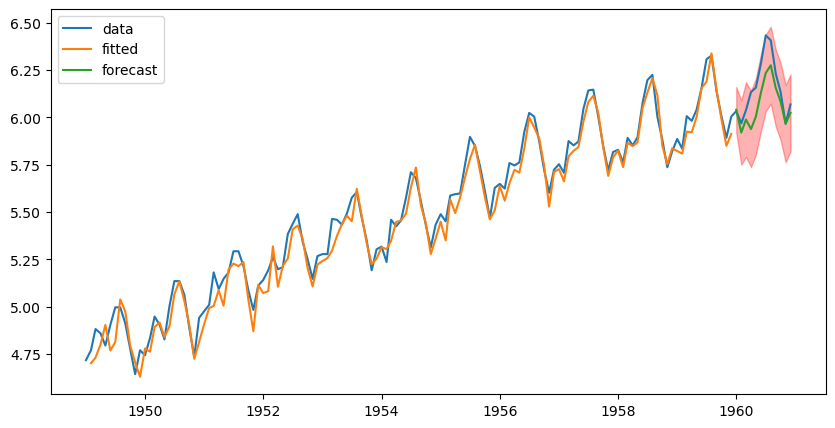

In [20]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [21]:
rmse(test['Passengers'], np.exp(test_pred))

56.40003432058934

In [22]:
### non-seasonal non-logged
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Mon, 05 Feb 2024   AIC                           1020.062
Time:                        14:02:21   BIC                           1066.065
Sample:                             0   HQIC                          1038.755
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.031
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.204
ar.L2         -0.2994      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1340      0.117     -1.149      0.251      -0.363       0.095
ar.L4         -0.2844      0.115     -2.482      0.013      -0.509      -0.060
ar.L5         -0.0919      0.116     -0.790      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1006      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3148      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3179      0.129     -2.470      0.013      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.583      0.560      -0.330       0.178
ar.L12         0.6366      0.126      5.058      0.000       0.390       0.883
ma.L1         -0.0961      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2346      0.185      1.267      0.205      -0.128       0.598
sigma2        97.8884     15.342      6.381      0.000      67.819     127.958
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

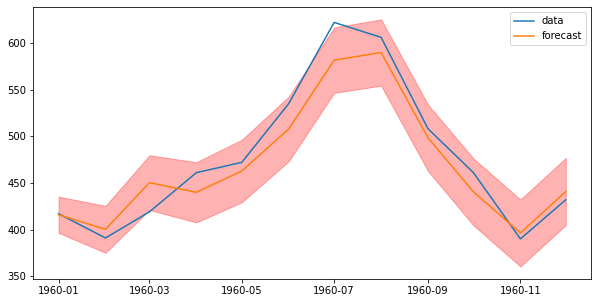

In [23]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [24]:
rmse(test['Passengers'], test_pred)

20.151252602400405